# Final Project Submission : OSEMN with King County House Sales Dataset

Please fill out:
* Student name: Emily J. Cain
* Student pace: full time
* Scheduled project review date/time: Tuesday, October 30, 2018, 1400 EST
* Instructor name: Rafael Carrasco


## Obtain

Read in from csv file

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('kc_house_data.csv')

In [3]:
# Check that csv loaded successfully 
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


## Scrub

* Change values to correct type as needed
* Replace or remove missing or placeholder values
* Change formatting as needed
* Check for typos and duplicates 

In [4]:
df.shape
# With less than 22,000 rows, I think I will be able to work with and manipulate the entire dataset

(21597, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


One initial question that will need to be answered: why are there two columns for square foot living (sqft_living, sqft_living15) and square foot lot (sqft_lot, sqft_lot15)?

In [6]:
square_feet = df[['sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_lot15']].copy()
square_feet.head()

,sqft_living,sqft_lot,sqft_living15,sqft_lot15
0,1180,5650,1340,5650
1,2570,7242,1690,7639
2,770,10000,2720,8062
3,1960,5000,1360,5000
4,1680,8080,1800,7503


In [7]:
square_feet.describe()
# The relationship between these values - and whether to keep each one - is not immediately apparent.

,sqft_living,sqft_lot,sqft_living15,sqft_lot15
count,21597.000000,2.159700e+04,21597.000000,21597.000000
mean,2080.321850,1.509941e+04,1986.620318,12758.283512
std,918.106125,4.141264e+04,685.230472,27274.441950
min,370.000000,5.200000e+02,399.000000,651.000000
25%,1430.000000,5.040000e+03,1490.000000,5100.000000
50%,1910.000000,7.618000e+03,1840.000000,7620.000000
75%,2550.000000,1.068500e+04,2360.000000,10083.000000
max,13540.000000,1.651359e+06,6210.000000,871200.000000


In [8]:
# check for null values
df.isna().sum()
# 2376 null values for waterfront, 63 for view, 3842 for yr_renovated

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [9]:
df.view.unique()
df.view.value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

With only five different values for 'view' - including a value of '0.0' - this seems to be a categorical variable, as it would be impossible for a home to have zero views. An empty property with no home could technically have zero views, but there are no rows with a '0' value for 'sqft,' and a home with only one view also seems unlikely. This value will most likely need to be changed to a categorical variable. Since there are only 63 null values, and the majority of values are '0.0,' the null values can be changed to '0.0.'  

In [10]:
# change null values to the median 0.0
df.view.fillna(0.0, inplace=True)
df.view.unique()

array([0., 3., 4., 2., 1.])

In [14]:
# change values to category
df.view = df.view.astype('category')

About 10% of the waterfront values are null, and less than 1% of the properties have a value of '1.0,' which I assume to mean 'True' for waterfront. I am going to change the null values to '0.0' or 'False,' and then change the dtype to 'bool.' Because there are so few 'True' values in this column, it may not be worthwhile to keep it in the dataset. 

In [20]:
# df.waterfront.unique()
# df.waterfront.value_counts()
# df.waterfront.isna().sum()
df.waterfront.fillna(0.0, inplace=True)
df.waterfront.unique()

array([0., 1.])

In [21]:
# change values to bool
df.waterfront = df.waterfront.astype('bool')

In [22]:
# confirm dtype change
df.waterfront.value_counts()

False    21451
True       146
Name: waterfront, dtype: int64

Similar to the 'waterfront' variable, the 'yr_renovated' variable contains a vast majority (96.5%) of '0.0' or null variables. Even if the 'yr_renovated' variable does have a high correlation with 'price,' the information available to us is so small that it may not be reliable. I will change the null variables to '0.0,' but I may end up dropping this column. 

In [25]:
# df.yr_renovated.unique()
df.yr_renovated.value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
2000.0       29
2005.0       29
1990.0       22
2004.0       22
2009.0       21
1989.0       20
2006.0       20
2002.0       17
1991.0       16
1998.0       16
1984.0       16
1999.0       15
2008.0       15
2010.0       15
2001.0       15
1983.0       15
2015.0       14
1985.0       14
1986.0       14
1987.0       14
1994.0       14
1992.0       13
1993.0       12
1997.0       12
1995.0       12
          ...  
1975.0        5
1964.0        5
1969.0        4
1963.0        4
1973.0        4
1981.0        4
1965.0        4
1978.0        3
1960.0        3
1958.0        3
1956.0        3
1955.0        3
1945.0        3
1972.0        3
1967.0        2
1957.0        2
1940.0        2
1974.0        2
1962.0        2
1953.0        1
1950.0        1
1934.0        1
1944.0        1
1976.0        1
1948.0        1
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Leng

In [28]:
df.yr_renovated.fillna(0.0, inplace=True)

In [29]:
# confirm that there are no null values in dataset
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [57]:
# Check for placeholders - tried using a for loop, but output was difficult to read/interpret
# Come back later to implement a readable for loop output so that code will be DRY
# df.id.unique() 
# df.date.unique()
# df.price.unique()
# df.bedrooms.unique() ***
# df.bathrooms.unique()
# df.sqft_living.unique()
# df.sqft_lot.unique()
# df.floors.unique()
# df.condition.unique()
# df.grade.unique()
# df.sqft_above.unique()
# df.sqft_basement.unique() ***
# df.yr_built.unique()
# df.zipcode.unique()
# df.lat.unique()
# df.long.unique()
# df.sqft_living15.unique()
# df.sqft_lot15.unique()

array([5650, 7639, 8062, ..., 5731, 1509, 2007])

In [63]:
# Possible error value found in df.bedrooms and placeholder found in df.sqft_basement
# df.bedrooms.value_counts() - 1 house with 33 bedrooms, the next highest bedroom count is 10
# df.bedrooms.median() - 3 bedrooms
# df.bathrooms.value_counts() - highest bathroom count 7.75

In [65]:
df.loc[df.bedrooms == 33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,False,0.0,...,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


One house has a bedroom value of '33,' which I am going to replace with the median value of 3 because I think this number was entered by mistake. Even though it's certainly possible for a house to have 33 bedrooms, the next highest bedroom count is 10, so this seems like a big jump. The bathroom counts are also continuous with the highest being 7.75 bathrooms, and a house with 33 bedrooms would probably need more than 7.75 bathrooms. I checked the other values on this exact house to be sure, and with a 'sqft_living' value of 1620, I am certain this value is not correct.

In [66]:
df.bedrooms.replace(33, df.bedrooms.median(), inplace=True)

In [67]:
# confirm replacement
df.bedrooms.value_counts()

3     9825
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64

In [84]:
# df.sqft_basement.unique()
# df.sqft_basement.value_counts()
# df.sqft_basement.median()
# df.info()
# if df.loc[df.sqft_basement != '?']:
    # df.sqft_basement.astype('int64')
    # print(df.sqft_basement.median())
# this doesn't work :( 

In [92]:
df.zipcode = df.zipcode.astype('category')

## Explore

* Understand the data through visualization, inspection, and descriptive statistics
* Explore relationships with visualization
* Understand why certain values were collected and included in dataset
* Genderate questions that can be answered from the data

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null bool
view             21597 non-null category
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null category
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: bool(1), category(2), float64(6), int64(10), object(2)
memory usag

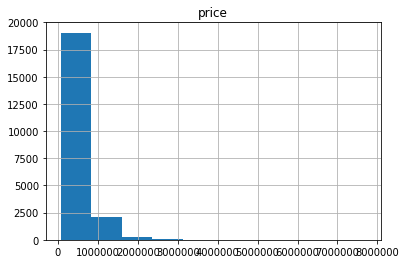

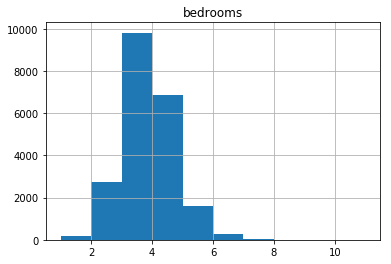

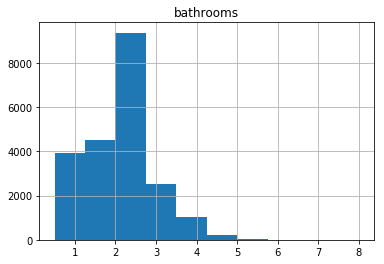

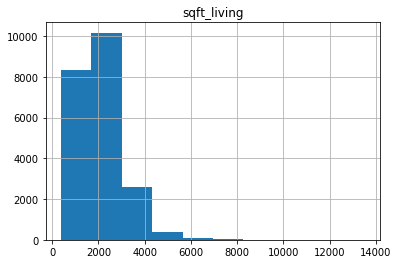

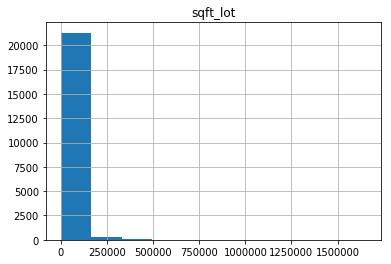

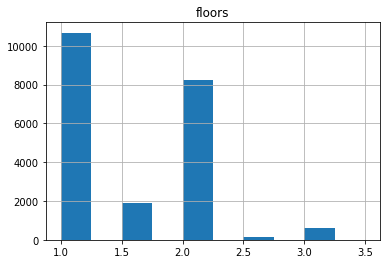

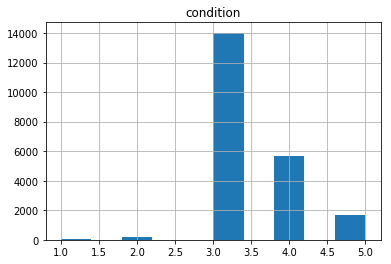

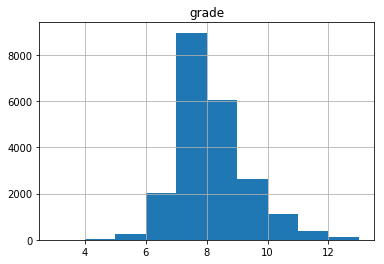

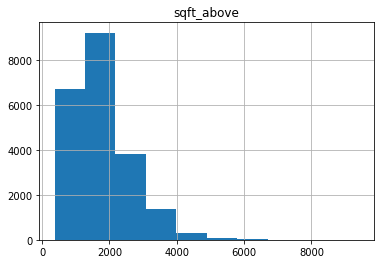

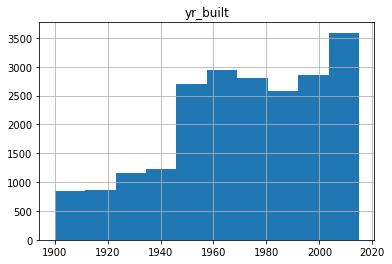

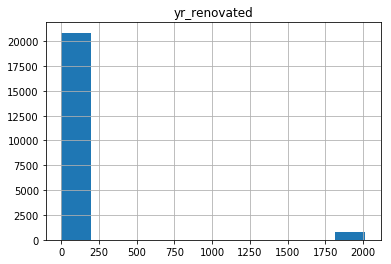

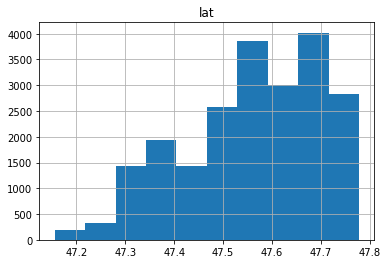

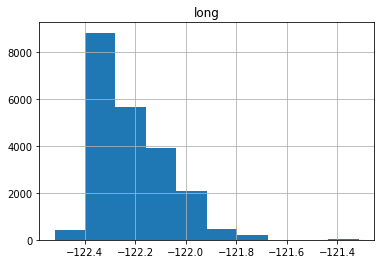

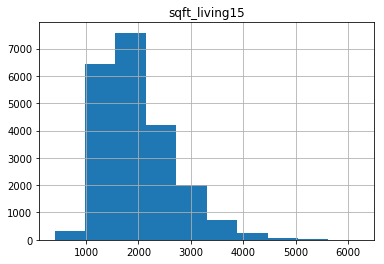

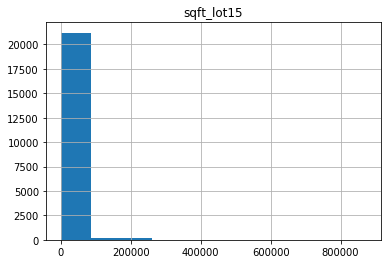

In [96]:
# explore distributions of column values that have already been cleaned 
cleaned_columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition', 'grade', 'sqft_above', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
for col in cleaned_columns:
    df.hist(column=col);

## Modeling - an Iterative Process

* Use questions to guide models
* Generate meaningful visualizations
* Normalize values as needed
* Use models to examine relationships between variables
* Assess model fit and robustness

## Interpret

* Draw conclusions from the data that answer initial questions or that raise new questions
* Evaluate meaning of results from a technical perspective
* Evaluate meaning of results for non-technical stakeholders
* Present and communicate results based on audience 